# TP3 - Filtrage numérique

Romanin CHARDARD\
Elwan LEFEVRE

In [92]:
import numpy as np
import sounddevice as sd
import scipy.signal as signal
from scipy.io import savemat, loadmat
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)

In [93]:
T = 3 # second
Ve = 20000 # Hz
K = np.int(np.ceil(T/(1/Ve))) # Nombre d'échantillon
t = np.arange(0, T, 1/Ve) # Vecteur temps au signal


In [94]:
# s = sd.rec(K, samplerate=Ve, channels=1).reshape(t.shape)
# sd.wait()
# sd.play(s, samplerate=Ve, blocking=True)
# savemat("message.mat", {"saved_signal": s})


In [95]:
signal = loadmat("message").get('saved_signal')[0]



In [98]:
def new_cos(V0,T,Ve):
    # Création de signal COS et de leurs echelle de temps
    temps =np.arange(0, T, 1/Ve)
    signal = np.cos(2*np.pi*V0*temps)
    return {
        "temps" : temps,
        "signal" : signal
    }

In [99]:
# Création du bruit
S1 = new_cos(50,T,Ve)
S2 = new_cos(300,T,Ve)
S3 = new_cos(1000,T,Ve)

In [102]:
s_noise = signal + 0.5*S1["signal"] + 0.5*S2["signal"] + 0.5*S3["signal"]
sd.play(s_noise, samplerate=Ve, blocking=True)
# dure moins longtemps

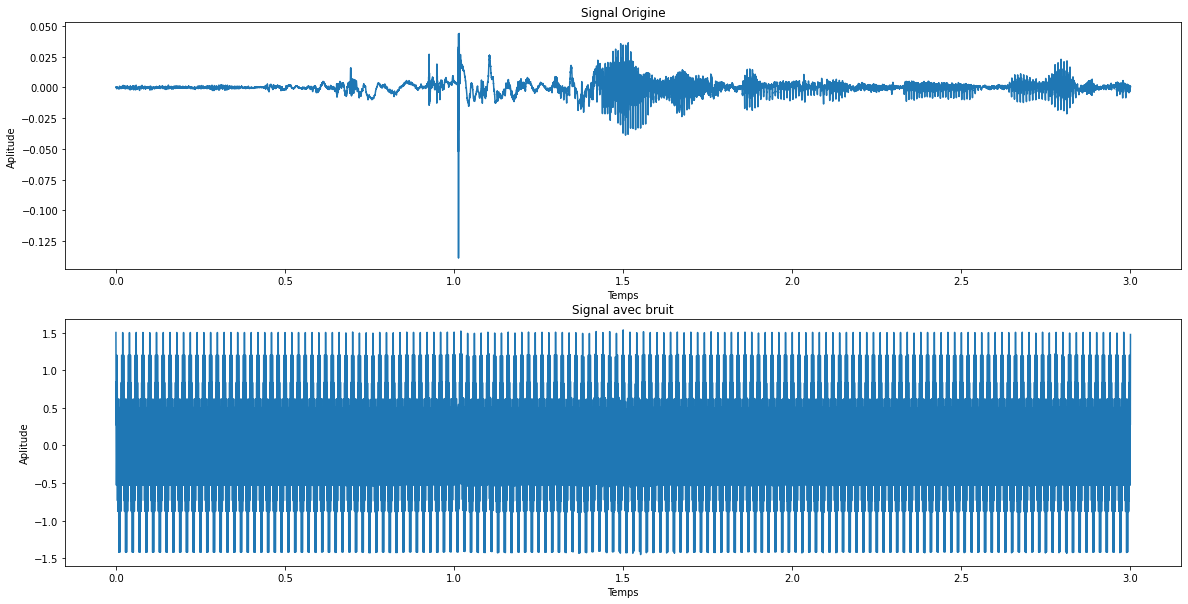

In [103]:
plt.figure(1)
plt.subplot(211)
plt.plot(t,signal)
plt.title("Signal Origine")
plt.xlabel("Temps")
plt.ylabel("Aplitude")
plt.subplot(212)
plt.plot(t,s_noise)
plt.title("Signal avec bruit")
plt.xlabel("Temps")
plt.ylabel("Aplitude")
plt.show()

## 1.7

On constate que le plot d'origine à un signal aléatoire, en comparaison, le signal ou on ajouter les 3 cosinus, notre signal aléatoire est perdu et on peut retrouver la fréquence de nos 3 cos dans le graphique

In [109]:
def getSpectre(signal, Ve,T):
    N = int(4*np.ceil(T/(1/Ve)))
    n = np.arange(N)
    S_init = np.fft.fft(signal,N)
    S = np.fft.fftshift(S_init)
    n = np.arange(len(S))
    nu = n*Ve/len(S) -Ve/2

    return nu,S

240000


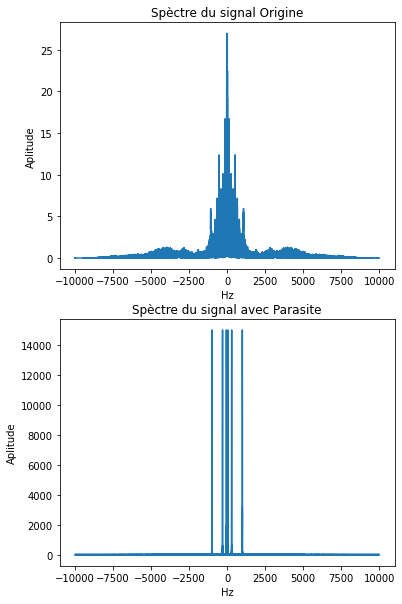

In [126]:
nue1,S1 = getSpectre(signal,Ve,T)
nue2,S2 = getSpectre(s_noise,Ve,T)
plt.figure(2).set_figwidth(6)
plt.subplot(211)
plt.plot(nue1,np.abs(S1))
plt.title("Spèctre du signal Origine")
plt.xlabel("Hz")
plt.ylabel("Aplitude")
plt.subplot(212)
print(len(nue2))
plt.plot(nue2, np.abs(S2))
plt.title("Spèctre du signal avec Parasite")
plt.xlabel("Hz")
plt.ylabel("Aplitude")
plt.show()

On retrouve ici les fréquence de nos parasite comparé au premier signal, la différence d'amplitude est du à un facteur $nue=20000$ qui proviant de la transformer de fourier d'un signal continue